# 1- Install and Import Dependencies

In [2]:
!pip3 install torch torchvision torchaudio

In [3]:
!git clone https://github.com/ultralytics/yolov5 

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [37]:
!cd yolov5 & pip install -r requirements.txt 

In [38]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2- Load Model

In [39]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\PMLS/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-8-18 Python-3.12.4 torch-2.4.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [40]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [41]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [42]:
result = model(img)
result.print()

C:\Users\PMLS/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 10475.9ms pre-process, 240.7ms inference, 4.0ms NMS per image at shape (1, 3, 384, 640)


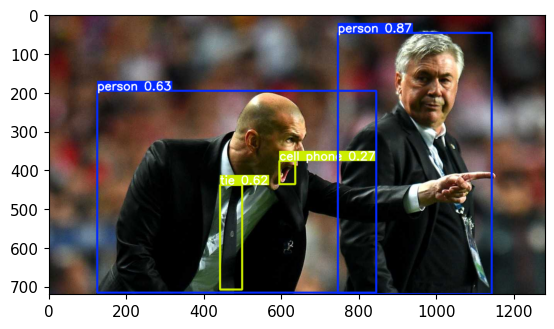

In [43]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))

plt.show()

In [44]:

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('Yolo v5', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


C:\Users\PMLS/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\PMLS/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\PMLS/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\PMLS/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\PMLS/.cache\torch\hub\ultralytics_yolov5_master\models\comm

In [45]:

import uuid
import os
import time

In [47]:
IMAGES_PATH = os.path.join('data','images')
labels = ['awake','drowsy']
number_imgs = 30

In [48]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('collecting images for {}'.format(label))
    time.sleep(5)
    #loop through image range
    for img_num in range(number_imgs):
        print('collecting images for {}, image number {}'.format(label,img_num))
        ret, frame = cap.read()

        imag_name = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imag_name, frame)
        cv2.imshow('image collection',frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

        


collecting images for awake
collecting images for awake, image number 0
collecting images for awake, image number 1
collecting images for awake, image number 2
collecting images for awake, image number 3
collecting images for awake, image number 4
collecting images for awake, image number 5
collecting images for awake, image number 6
collecting images for awake, image number 7
collecting images for awake, image number 8
collecting images for awake, image number 9
collecting images for awake, image number 10
collecting images for awake, image number 11
collecting images for awake, image number 12
collecting images for awake, image number 13
collecting images for awake, image number 14
collecting images for awake, image number 15
collecting images for awake, image number 16
collecting images for awake, image number 17
collecting images for awake, image number 18
collecting images for awake, image number 19
collecting images for awake, image number 20
collecting images for awake, image nu

In [49]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [50]:
! pip install pyqt5 lxml --upgrade
! cd labelImg & pyrcc5 -o libs/resources.py resources.qrc

In [51]:
! cd yolov5 & python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 4

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=4, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\PMLS\Documents\Machine': No such file or directory
YOLOv5  2024-8-17 Python-3.12.4 torch-2.4.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_

In [53]:
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\PMLS/.cache\torch\hub\master.zip
YOLOv5  2024-8-18 Python-3.12.4 torch-2.4.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [62]:
img = os.path.join('data','images','drowsy.23594a41-5d65-11ef-b049-e02e0be6fd5b.jpg')

In [63]:
results = model(img)

C:\Users\PMLS/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [64]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 69.2ms pre-process, 453.2ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


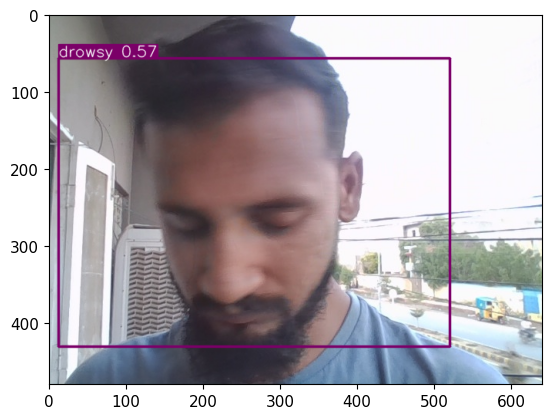

In [65]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [1]:

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('Yolo v5', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined